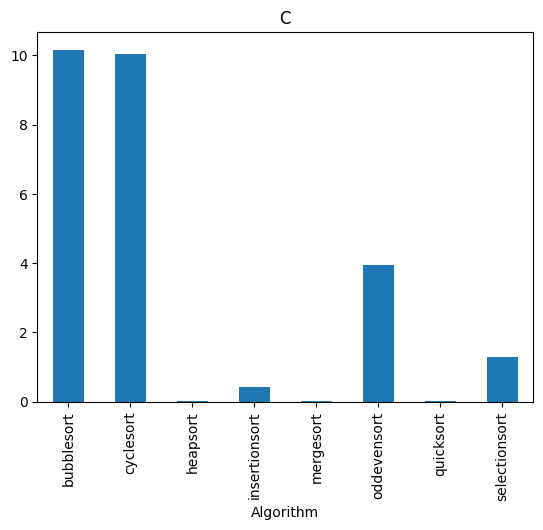

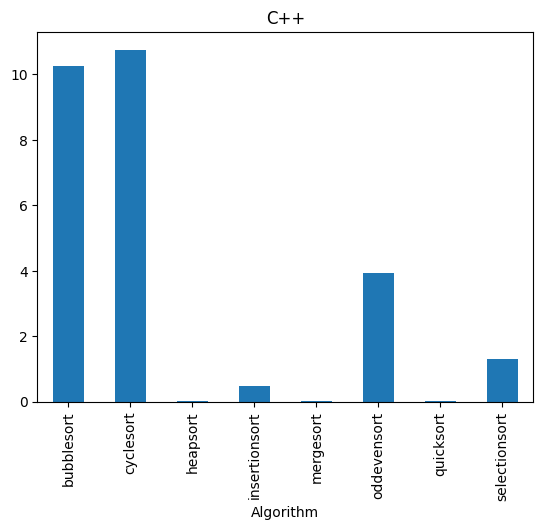

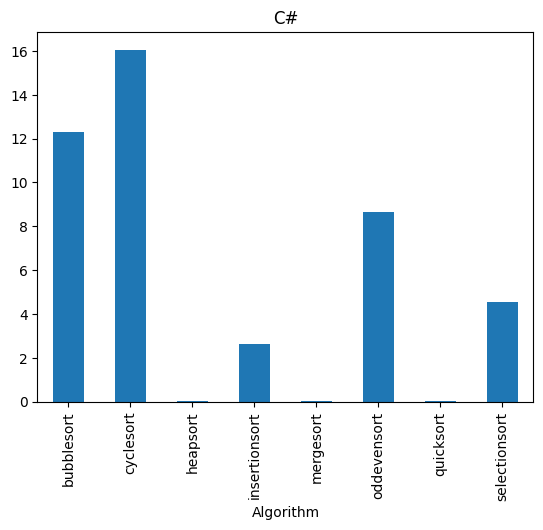

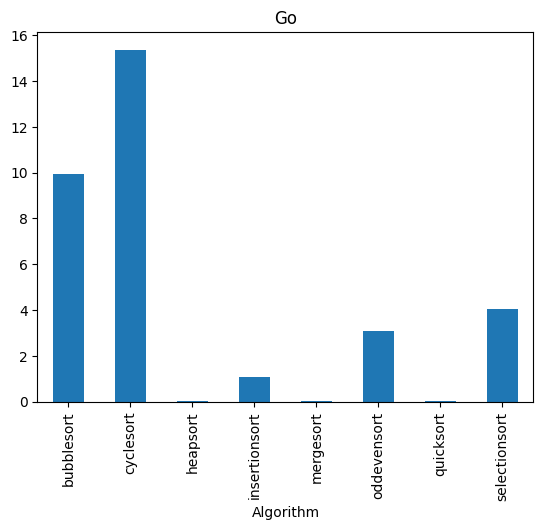

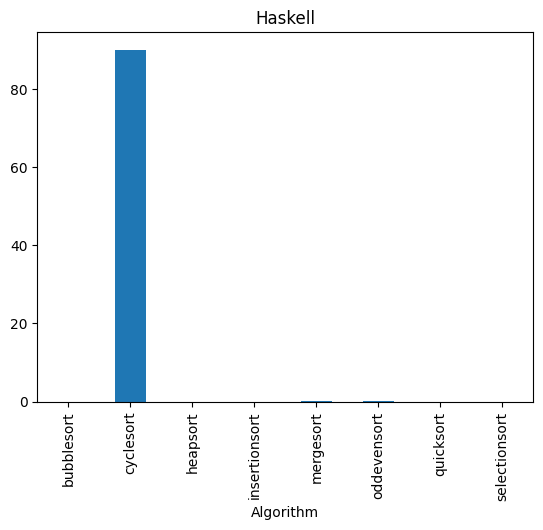

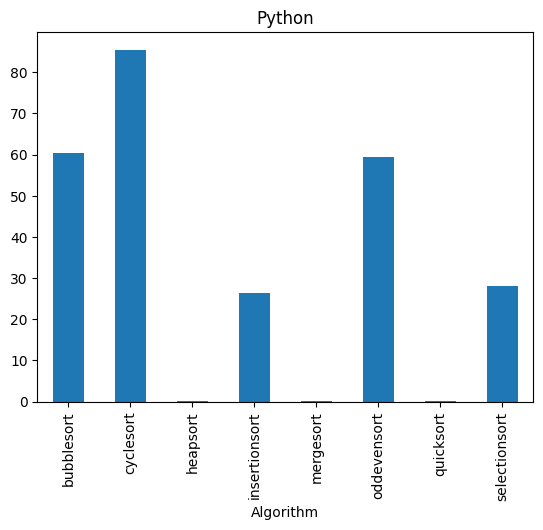

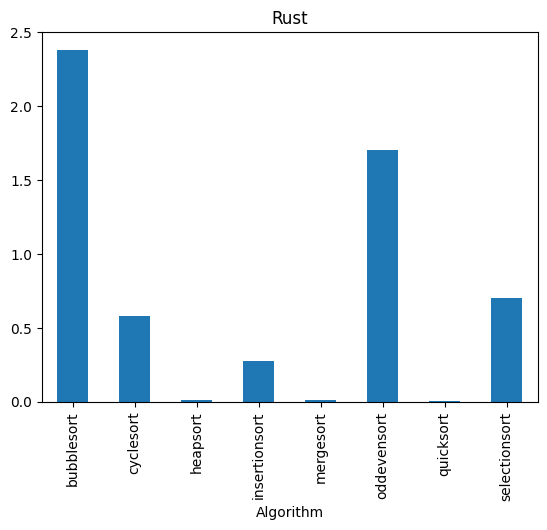

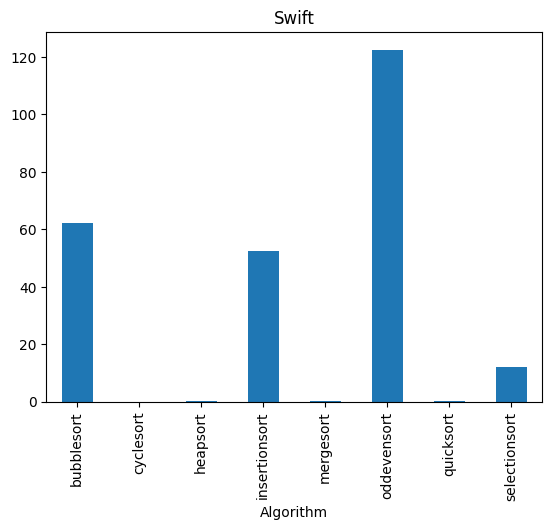

/home/tgvp/.local/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 0 ( ) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


ValueError: Image size of 81040x530 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>

In [2]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
from typing import Any

f = open('../results/clean.csv')
c = csv.DictReader(f, delimiter=',')

joined_by_lang: dict[str, list[Any]] = {}
for trace in c:
    lang = trace['Language']
    if lang in joined_by_lang.keys():
        joined_by_lang[lang].append(trace)
    else: 
        joined_by_lang[lang] = [trace]

for (lang_name, lang_traces) in joined_by_lang.items():
    df = pd.DataFrame(lang_traces)
    df = df.astype({'Time(sec)': 'float32'})
    df_time = df.groupby('Algorithm')['Time(sec)'].mean()
    df_time.plot(kind='bar', title=lang_name)
    plt.show()

